In [8]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import hamming_loss, f1_score, precision_score
from sklearn.multioutput import MultiOutputClassifier

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
file_path = './dataset.csv'
df = pd.read_csv(file_path)

# Text Cleaning Function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply text cleaning to the 'report' column
df['cleaned_report'] = df['report'].apply(clean_text)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_report'])

# Prepare the labels (binary matrix)
labels = df.drop(columns=['report', 'cleaned_report'])
y = labels.values

# Remove 'type_task' label
df = df.drop(columns=['type_task'])
labels = df.drop(columns=['report', 'cleaned_report'])
y = labels.values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_train)
# Train and evaluate different models using MultiOutputClassifier for multi-label classification

# 1. Logistic Regression (One-vs-Rest)
lr_model = LogisticRegression(solver='liblinear')
lr_multi_model = MultiOutputClassifier(lr_model, n_jobs=-1)
lr_multi_model.fit(X_train, y_train)
lr_pred = lr_multi_model.predict(X_test)

# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_multi_model = MultiOutputClassifier(svm_model, n_jobs=-1)
svm_multi_model.fit(X_train, y_train)
svm_pred = svm_multi_model.predict(X_test)

# 3. Perceptron
perceptron_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
perceptron_multi_model = MultiOutputClassifier(perceptron_model, n_jobs=-1)
perceptron_multi_model.fit(X_train, y_train)
perceptron_pred = perceptron_multi_model.predict(X_test)

# 4. Deep Neural Network (DNN)
dnn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
dnn_multi_model = MultiOutputClassifier(dnn_model, n_jobs=-1)
dnn_multi_model.fit(X_train, y_train)
dnn_pred = dnn_multi_model.predict(X_test)

# Evaluate using multi-label metrics
def evaluate_model(y_true, y_pred):
    # Hamming Loss
    hamming = hamming_loss(y_true, y_pred)
    # F1 Score (Micro)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    # F1 Score (Macro)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    # Precision (Micro)
    precision_micro = precision_score(y_true, y_pred, average='micro')
    return hamming, f1_micro, f1_macro, precision_micro

# Logistic Regression Evaluation
lr_hamming, lr_f1_micro, lr_f1_macro, lr_precision = evaluate_model(y_test, lr_pred)
print(f"Logistic Regression - Hamming Loss: {lr_hamming}, F1 Micro: {lr_f1_micro}, F1 Macro: {lr_f1_macro}, Precision: {lr_precision}")

# SVM Evaluation
svm_hamming, svm_f1_micro, svm_f1_macro, svm_precision = evaluate_model(y_test, svm_pred)
print(f"SVM - Hamming Loss: {svm_hamming}, F1 Micro: {svm_f1_micro}, F1 Macro: {svm_f1_macro}, Precision: {svm_precision}")

# Perceptron Evaluation
perceptron_hamming, perceptron_f1_micro, perceptron_f1_macro, perceptron_precision = evaluate_model(y_test, perceptron_pred)
print(f"Perceptron - Hamming Loss: {perceptron_hamming}, F1 Micro: {perceptron_f1_micro}, F1 Macro: {perceptron_f1_macro}, Precision: {perceptron_precision}")

# DNN Evaluation
dnn_hamming, dnn_f1_micro, dnn_f1_macro, dnn_precision = evaluate_model(y_test, dnn_pred)
print(f"DNN - Hamming Loss: {dnn_hamming}, F1 Micro: {dnn_f1_micro}, F1 Macro: {dnn_f1_macro}, Precision: {dnn_precision}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sefas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [0 0 1 1 0 0]
 ...
 [0 0 1 0 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]]


KeyboardInterrupt: 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Hyperparameter tuning for SVM using GridSearchCV with MultiOutputClassifier
svm_param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter for SVM
    'estimator__kernel': ['linear', 'rbf'],  # Kernel type
}

svm_model = MultiOutputClassifier(SVC(probability=True))
grid_search_svm = GridSearchCV(svm_model, svm_param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
print(f"Best SVM Parameters: {grid_search_svm.best_params_}")

# Hyperparameter tuning for Perceptron using GridSearchCV with MultiOutputClassifier
perceptron_param_grid = {
    'estimator__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter for Perceptron
    'estimator__max_iter': [1000, 2000, 3000],  # Number of iterations
}

perceptron_model = MultiOutputClassifier(MLPClassifier())
grid_search_perceptron = GridSearchCV(perceptron_model, perceptron_param_grid, cv=5)
grid_search_perceptron.fit(X_train, y_train)
best_perceptron = grid_search_perceptron.best_estimator_
print(f"Best Perceptron Parameters: {grid_search_perceptron.best_params_}")


Best SVM Parameters: {'estimator__C': 10, 'estimator__kernel': 'rbf'}
Best Perceptron Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000}


Best SVM AUC-ROC: 0.7027480618688501
Best Perceptron AUC-ROC: 0.7316925407182993
Best SVM Precision@k: 0.5971223021582733
Best Perceptron Precision@k: 0.5863309352517985
Best SVM F1 Micro: 0.8336380255941499, F1 Macro: 0.5744205620645043
Best Perceptron F1 Micro: 0.8213627992633518, F1 Macro: 0.6410141365569135
Best SVM Hamming Loss: 0.1091127098321343
Best Perceptron Hamming Loss: 0.11630695443645084


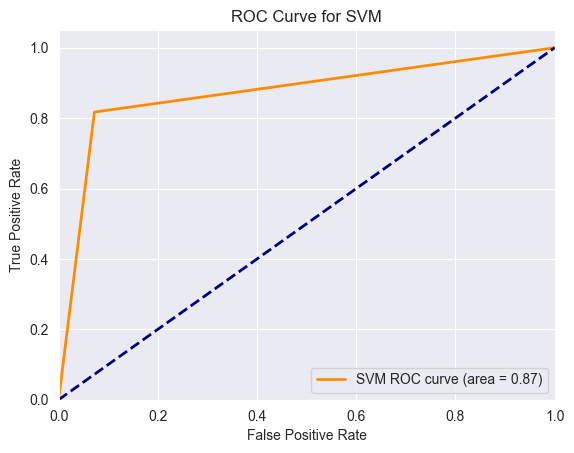

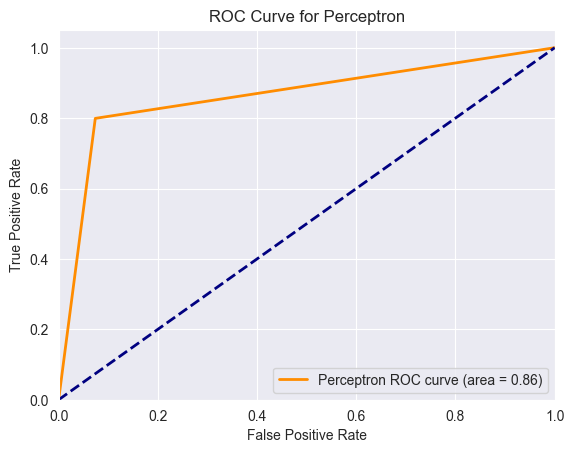

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, f1_score, hamming_loss, roc_curve, auc
import numpy as np
from sklearn.metrics import precision_recall_curve

# Train the best SVM model and Perceptron model from GridSearchCV
best_svm.fit(X_train, y_train)  # Train the best SVM model
best_svm_predictions = best_svm.predict(X_test)  # Make predictions on the test set

# Train the best Perceptron model and make predictions
best_perceptron.fit(X_train, y_train)  # Train the best Perceptron model
best_perceptron_predictions = best_perceptron.predict(X_test)  # Make predictions on the test set

# 1. AUC-ROC Score Calculation
def calculate_auc_roc(y_true, y_pred):
    auc_roc = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
    return auc_roc

# Calculate AUC-ROC for both SVM and Perceptron models
svm_auc_roc = calculate_auc_roc(y_test, best_svm_predictions)
print(f"Best SVM AUC-ROC: {svm_auc_roc}")

perceptron_auc_roc = calculate_auc_roc(y_test, best_perceptron_predictions)
print(f"Best Perceptron AUC-ROC: {perceptron_auc_roc}")

# 2. Precision@k Calculation
def precision_at_k(y_true, y_pred, k=3):
    precision_at_k = []
    for true, pred in zip(y_true, y_pred):
        top_k_preds = np.argsort(pred)[::-1][:k]  # Get indices of top-k predictions
        correct_preds = np.sum([true[i] for i in top_k_preds])  # Check how many are correct
        precision_at_k.append(correct_preds / k)  # Precision@k = correct / k
    return np.mean(precision_at_k)

# Calculate Precision@k for both models
precision_at_k_svm = precision_at_k(y_test, best_svm_predictions)
print(f"Best SVM Precision@k: {precision_at_k_svm}")

precision_at_k_perceptron = precision_at_k(y_test, best_perceptron_predictions)
print(f"Best Perceptron Precision@k: {precision_at_k_perceptron}")

# 3. F1-Score Calculation (Micro and Macro)
def calculate_f1_score(y_true, y_pred):
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    return f1_micro, f1_macro

# Calculate F1-Scores for both models
f1_micro_svm, f1_macro_svm = calculate_f1_score(y_test, best_svm_predictions)
print(f"Best SVM F1 Micro: {f1_micro_svm}, F1 Macro: {f1_macro_svm}")

f1_micro_perceptron, f1_macro_perceptron = calculate_f1_score(y_test, best_perceptron_predictions)
print(f"Best Perceptron F1 Micro: {f1_micro_perceptron}, F1 Macro: {f1_macro_perceptron}")

# 4. Hamming Loss Calculation
hamming_loss_svm = hamming_loss(y_test, best_svm_predictions)
print(f"Best SVM Hamming Loss: {hamming_loss_svm}")

hamming_loss_perceptron = hamming_loss(y_test, best_perceptron_predictions)
print(f"Best Perceptron Hamming Loss: {hamming_loss_perceptron}")

# 5. Visualize ROC Curve for both models
def plot_roc_curve(y_true, y_pred, model_name="Model"):
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())  # Flatten to make it binary for AUC
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Plot the ROC Curve for both SVM and Perceptron models
plot_roc_curve(y_test, best_svm_predictions, model_name="SVM")
plot_roc_curve(y_test, best_perceptron_predictions, model_name="Perceptron")


In [5]:
import dill

# Save the trained Task 2 models using dill
with open('best_svm_model_task2.pkl', 'wb') as f:
    dill.dump(svm_multi_model, f)  # Save the SVM model (multi-output)

with open('best_logreg_model_task2.pkl', 'wb') as f:
    dill.dump(lr_multi_model, f)  # Save the Logistic Regression model (multi-output)

with open('best_mlp_model_task2.pkl', 'wb') as f:
    dill.dump(perceptron_multi_model, f)  # Save the Perceptron (MLP) model (multi-output)

with open('best_dnn_model_task2.pkl', 'wb') as f:
    dill.dump(dnn_multi_model, f)  # Save the DNN model (multi-output)
